In [1]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'matplotlib'

Books

In [ ]:
books = pd.read_csv("BX-Books.csv")
books.head

# Checking for any empty rows
empty_rows = books[books.isna().any(axis=1) | books.eq('').any(axis=1)]
print(empty_rows)

# Checking the Year of Publication first
YOF = books["Year-Of-Publication"]
values, counts = np.unique(YOF, return_counts=True)
for value, count in zip(values, counts):
    print("YOF:", value, ", Count:", count)

# Performing Scaling on the Numerical Data
mode_YOF = YOF.mode()[0]
books["Year-Of-Publication"] = books["Year-Of-Publication"].replace(0, mode_YOF)
books["Year-Of-Publication"] = books["Year-Of-Publication"].replace(2030, mode_YOF)
YOF = books["Year-Of-Publication"]
values, counts = np.unique(YOF, return_counts=True)
for value, count in zip(values, counts):
    print("Published Year:", value, ", Count:", count)

# Performing Data Manipulation on worded data to make them all lowercase
books["Book-Publisher"] = books["Book-Publisher"].str.lower()
books["Book-Author"] = books["Book-Author"].str.lower()
books['Book-Author'] = books['Book-Author'].str.replace(r'[^\w\s\'\-.]', '')
books["Book-Title"] = books["Book-Title"].str.lower()
print(books.iloc[0:50])

# Checking the ISBN and if they are formatted correctly
def isbn_check(isbn):
    if len(isbn) != 10:
        return False
    if not isbn[:-1].isdigit():
        return False
    if not (isbn[-1].isdigit() or isbn[-1] == "X"):
        return False
    return True

invalid_isbn = books[~books["ISBN"].apply(isbn_check)]
print(invalid_isbn)

# Performing Data Manipulation on the ISBNs to make them consistent
invalid_isbn_rows = books[books["ISBN"].str.contains('x')]
books.loc[invalid_isbn_rows.index, "ISBN"] = books.loc[invalid_isbn_rows.index, "ISBN"].str.upper()

invalid_isbn = books[~books["ISBN"].apply(isbn_check)]
print(invalid_isbn)

# Plotting the Number of Books published per year
books["Year-Of-Publication"] = pd.to_datetime(books["Year-Of-Publication"], format='%Y')
years = books["Year-Of-Publication"].dt.year
bins = range(1920, 2020, 10)
year_intervals = pd.cut(years, bins=bins, right=False)
year_counts = year_intervals.value_counts().sort_index()

plt.figure()
year_counts.plot(kind="bar")
plt.title("Number of Books published per year")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books published (In log10)")
plt.grid(axis="y")
plt.yscale("log")
plt.show()

# View the head of the dataframe
books.head


Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Book-Publisher]
Index: []
YOF: 0 , Count: 314
YOF: 1920 , Count: 2
YOF: 1927 , Count: 1
YOF: 1929 , Count: 1
YOF: 1930 , Count: 1
YOF: 1932 , Count: 1
YOF: 1936 , Count: 1
YOF: 1938 , Count: 1
YOF: 1942 , Count: 1
YOF: 1945 , Count: 1
YOF: 1946 , Count: 2
YOF: 1947 , Count: 1
YOF: 1949 , Count: 1
YOF: 1950 , Count: 2
YOF: 1951 , Count: 2
YOF: 1952 , Count: 3
YOF: 1953 , Count: 14
YOF: 1954 , Count: 6
YOF: 1955 , Count: 4
YOF: 1956 , Count: 5
YOF: 1957 , Count: 4
YOF: 1958 , Count: 5
YOF: 1959 , Count: 6
YOF: 1960 , Count: 6
YOF: 1961 , Count: 9
YOF: 1962 , Count: 6
YOF: 1963 , Count: 9
YOF: 1964 , Count: 9
YOF: 1965 , Count: 7
YOF: 1966 , Count: 10
YOF: 1967 , Count: 4
YOF: 1968 , Count: 5
YOF: 1969 , Count: 19
YOF: 1970 , Count: 25
YOF: 1971 , Count: 15
YOF: 1972 , Count: 31
YOF: 1973 , Count: 19
YOF: 1974 , Count: 24
YOF: 1975 , Count: 13
YOF: 1976 , Count: 46
YOF: 1977 , Count: 60
YOF: 1978 , Count: 55
YOF

<bound method NDFrame.head of              ISBN                                         Book-Title  \
0      0002005018                                       clara callan   
1      0374157065  flu: the story of the great influenza pandemic...   
2      0399135782                             the kitchen god's wife   
3      0440234743                                      the testament   
4      0452264464               beloved (plume contemporary fiction)   
...           ...                                                ...   
18180  0375411615                                         love, etc.   
18181  0836227751              the wit and whimsy of mary engelbreit   
18182  8433966634                            los detectives salvajes   
18183  0330353349                  the ice house (tv tie-in edition)   
18184  0394757645  trouble is my business (vintage crime/black li...   

                Book-Author  Year-Of-Publication             Book-Publisher  
0      richard bruce wright

Users

In [ ]:
import re
# Read the DB
users = pd.read_csv("BX-Users.csv")

""" Pre-processing the Age column """
# Manipulating the elements
users['User-Age'] = users['User-Age'].str.rstrip('"')
# Imputate the missing data using the mode age
ages = users['User-Age']
mode_age = ages.mode()[0]
ages = ages.fillna(mode_age).astype(int)

# Convert to object dtype
ages = ages.astype(object)

# Classify the ages into different age categories
for i in  range(len(ages)):
  if (ages[i] < 10):
    ages[i] = 'kids'
  elif ((ages[i] >= 10) & (ages[i] < 18)):
    ages[i] = 'adolescent'
  elif ((ages[i] >= 18) & (ages[i] < 40)):
    ages[i] = 'adult'
  elif ((ages[i] >= 40) & (ages[i] < 60)):
    ages[i] = 'middle-aged adult'
  else:
    ages[i] = 'old adult'

#Calculate percentage of users that are adults
count = 0
for i in range(len(ages)):
  if ages[i] == 'adult':
    count = count+1
print(count/len(ages))
users['User-Age'] = ages
# Check to see if all rows have been classified
value_counts = users['User-Age'].value_counts()
unique_strings = value_counts.index
counts = value_counts.values
for string, count in zip(unique_strings, counts):
    print(f"Age Category: {string}, Count: {count}")




""" Pre-processing the Country column """
# Re-format elements in the column by casefolding 
users["User-Country"] = users["User-Country"].str.lower().str.strip()
# Getting keys from dictionaries of 
# existing countries from Github repository https://github.com/QuantumTech11/PythonDictionaries/blob/master/Countries%20Dictionary.py 
Countries = {
"Afghanistan" : "Kabul",
"Albania" : "Tirana",
"Algeria" : "Algiers",
"Andorra" : "Andorra la Vella",
"Angola" : "Luanda",
"Antigua and Barbuda" : "Saint John’s",
"Argentina" : "Buenos Aires",
"Armenia" : "Yerevan",
"Australia" : "Canberra",
"Austria" : "Vienna",
"Azerbaijan" : "Baku",
"The Bahamas" : "Nassau",
"Bahrain" : "Manama",
"Bangladesh" : "Dhaka",
"Barbados" : "Bridgetown",
"Belarus" : "Minsk",
"Belgium" : "Brussels",
"Belize" : "Belmopan",
"Benin" : "Porto-Novo",
"Bhutan" : "Thimphu",
"Bolivia" : "La Paz, Sucre",
"Bosnia and Herzegovina" : "Sarajevo",
"Botswana" : "Gaborone",
"Brazil" : "Brasilia",
"Brunei" : "Bandar Seri Begawan",
"Bulgaria" : "Sofia",
"Burkina Faso" : "Ouagadougou",
"Burundi" : "Bujumbura",
"Cambodia" : "Phnom Penh",
"Cameroon" : "Yaounde",
"Canada" : "Ottawa",
"Cape Verde" : "Praia",
"Central African Republic" : "Bangui",
"Chad" : "N’Djamena",
"Chile" : "Santiago",
"China" : "Beijing",
"Colombia" : "Bogota",
"Comoros" : "Moroni",
"Republic of the Congo": "Brazzaville",
"Democratic Republic of the Congo" : "Kinshasa",
"Costa Rica" : "San Jose",
"Cote d’Ivoire" : "Yamoussoukro",
"Croatia" : "Zagreb",
"Cuba" : "Havana",
"Cyprus" : "Nicosia",
"Czech Republic" : "Prague",
"Denmark" : "Copenhagen",
"Djibouti" : "Djibouti",
"Dominica" : "Roseau",
"Dominican Republic" : "Santo Domingo",
"East Timor" : "Dili",
"Ecuador" : "Quito",
"Egypt" : "Cairo",
"El Salvador" : "San Salvador",
"Equatorial Guinea" : "Malabo",
"Eritrea" : "Asmara",
"Estonia" : "Tallinn",
"Ethiopia" : "Addis Ababa",
"Fiji" : "Suva",
"Finland" : "Helsinki",
"France" : "Paris",
"Gabon" : "Libreville",
"The Gambia" : "Banjul",
"Georgia" : "Tbilisi",
"Germany" : "Berlin",
"Ghana" : "Accra",
"Greece" : "Athens",
"Grenada" : "Saint George’s",
"Guatemala" : "Guatemala City",
"Guinea" : "Conakry",
"Guinea-Bissau" : "Bissau",
"Guyana" : "Georgetown",
"Haiti" : "Port-au-Prince",
"Honduras" : "Tegucigalpa",
"Hungary" : "Budapest",
"Iceland" : "Reykjavik",
"India" : "New Delhi",
"Indonesia" : "Jakarta",
"Iran" : "Tehran",
"Iraq" : "Baghdad",
"Ireland" : "Dublin",
"Israel" : "Jerusalem",
"Italy" : "Rome",
"Jamaica" : "Kingston",
"Japan" : "Tokyo",
"Jordan" : "Amman",
"Kazakhstan" : "Astana",
"Kenya" : "Nairobi",
"Kiribati" : "Tarawa Atoll",
"North Korea" : "Pyongyang",
"South Korea" : "Seoul",
"Kosovo" : "Pristina",
"Kuwait" : "Kuwait City",
"Kyrgyzstan" : "Bishkek",
"Laos" : "Vientiane",
"Latvia" : "Riga",
"Lebanon" : "Beirut",
"Lesotho" : "Maseru",
"Liberia" : "Monrovia",
"Libya" : "Tripoli",
"Liechtenstein" : "Vaduz",
"Lithuania" : "Vilnius",
"Luxembourg" : "Luxembourg",
"Macedonia" : "Skopje",
"Madagascar" : "Antananarivo",
"Malawi" : "Lilongwe",
"Malaysia" : "Kuala Lumpur",
"Maldives" : "Male",
"Mali" : "Bamako",
"Malta" : "Valletta",
"Marshall Islands" : "Majuro",
"Mauritania" : "Nouakchott",
"Mauritius" : "Port Louis",
"Mexico" : "Mexico City",
"Federated States of Micronesia" : "Palikir",
"Moldova" : "Chisinau",
"Monaco" : "Monaco",
"Mongolia" : "Ulaanbaatar",
"Montenegro" : "Podgorica",
"Morocco" : "Rabat",
"Mozambique" : "Maputo",
"Myanmar" : "Naypyidaw",
"Namibia" : "Windhoek",
"Nauru" : "Yaren District",
"Nepal" : "Kathmandu",
"Netherlands" : "Amsterdam",
"New Zealand" : "Wellington",
"Nicaragua" : "Managua",
"Niger" : "Niamey",
"Nigeria" : "Abuja",
"Norway" : "Oslo",
"Oman" : "Muscat",
"Pakistan" : "Islamabad",
"Palau" : "Melekeok",
"Panama" : "Panama City",
"Papua New Guinea" : "Port Moresby",
"Paraguay" : "Asuncion",
"Peru" : "Lima",
"Philippines" : "Manila",
"Poland" : "Warsaw",
"Portugal" : "Lisbon",
"Qatar" : "Doha",
"Romania" : "Bucharest",
"Russia" : "Moscow",
"Rwanda" : "Kigali",
"Saint Kitts and Nevis" : "Basseterre",
"Saint Lucia" : "Castries",
"Saint Vincent and the Grenadines" : "Kingstown",
"Samoa" : "Apia",
"San Marino" : "San Marino",
"Sao Tome and Principe" : "Sao Tome",
"Saudi Arabia" : "Riyadh",
"Senegal" : "Dakar",
"Serbia" : "Belgrade",
"Seychelles" : "Victoria",
"Sierra Leone" : "Freetown",
"Singapore" : "Singapore",
"Slovakia" : "Bratislava",
"Slovenia" : "Ljubljana",
"Solomon Islands" : "Honiara",
"Somalia" : "Mogadishu",
"South Africa" : "Pretoria, Cape Town, Bloemfontein",
"South Sudan" : "Juba",
"Spain" : "Madrid",
"Sri Lanka" : "Colombo, Sri Jayewardenepura Kotte",
"Sudan" : "Khartoum",
"Suriname" : "Paramaribo",
"Swaziland" : "Mbabane",
"Sweden" : "Stockholm",
"Switzerland" : "Bern",
"Syria" : "Damascus",
"Taiwan" : "Taipei",
"Tajikistan" : "Dushanbe",
"Tanzania" : "Dodoma",
"Thailand" : "Bangkok",
"Togo" : "Lome",
"Tonga" : "Nuku’alofa",
"Trinidad and Tobago" : "Port-of-Spain",
"Tunisia" : "Tunis",
"Turkey" : "Ankara",
"Turkmenistan" : "Ashgabat",
"Tuvalu" : "Funafuti",
"Uganda" : "Kampala",
"Ukraine" : "Kyiv",
"United Arab Emirates" : "Abu Dhabi",
"United Kingdom" : "London",
"USA" : "Washington D.C.",
"Uruguay" : "Montevideo",
"Uzbekistan" : "Tashkent",
"Vanuatu" : "Port-Vila",
"Vatican City" : "Vatican City",
"Venezuela" : "Caracas",
"Vietnam" : "Hanoi",
"Yemen" : "Sanaa",
"Zambia" : "Lusaka",
"Zimbabwe" : "Harare"
}
countries = list(Countries.keys())
# Punctuation removal to facilitate change of elements due to spelling mistakes 
lowercase_countries = [x.lower() for x in countries]
for i in range(len(users)):
    country = str(users.at[i, 'User-Country'])
    country = re.sub(r'[\"\.\']', '', country)
    users.at[i, 'User-Country'] = country
# Finding common mistakes in inputs of elements and correcting it (kind of lamentising maybe?)
users.loc[users['User-Country'].str.contains('ame|sta', case=False), 'User-Country'] = 'usa'
users.loc[users['User-Country'].str.contains('eng|kind|scot|wales|uk', case=False), 'User-Country'] = 'united kingdom'
users.loc[users['User-Country'].str.contains('ita', case=False), 'User-Country'] = 'italy'
users.loc[users['User-Country'].str.contains('fra', case=False), 'User-Country'] = 'france'
# Classify data that are not names of a country and imputate missing data as blank
users.loc[~users['User-Country'].isin(lowercase_countries), 'User-Country'] = '-'

""" Pre-process the States column """
countries_with_states = ['usa', 'nigeria','mexico','india','brazil','germany','malaysia','austria','myanmar','australia','new zealand', 'south sudan','canada']
# Classify rows that have countries that don't have a states as a blank
users.loc[~users['User-Country'].isin(countries_with_states), 'User-State'] = '-'

""" Pre-process the City column"""
# Classify rows that don't have a country as blank
users.loc[users['User-Country'] == '-', 'User-City'] = '-'
# Imputate missing rows as blank
users.loc[users['User-City'].isna(), 'User-City'] = '-'





''' Test print '''
users.head(30)



Age Category: adult, Count: 36028
Age Category: middle-aged adult, Count: 8580
Age Category: old adult, Count: 1898
Age Category: adolescent, Count: 1618
Age Category: kids, Count: 175


,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,adult
1,9,germantown,tennessee,usa,adult
2,16,albuquerque,new mexico,usa,adult
3,17,chesapeake,virginia,usa,adult
4,19,-,-,-,adolescent
5,26,bellevue,washington,usa,adult
6,32,portland,oregon,usa,adult
7,39,cary,north carolina,usa,adult
8,42,appleton,wisconsin,usa,adolescent
9,44,black mountain,north carolina,usa,middle-aged adult


Ratings

In [ ]:
ratings = pd.read_csv("BX-Ratings.csv")
ratings.head

# Checking for any empty rows
empty_rows = ratings[ratings.isna().any(axis=1) | ratings.eq('').any(axis=1)]
print(empty_rows)

# Checking the ISBN and if they are formatted correctly
def isbn_check(isbn):
    if len(isbn) != 10:
        return False
    if not isbn[:-1].isdigit():
        return False
    if not (isbn[-1].isdigit() or isbn[-1] == "X"):
        return False
    return True

invalid_isbn = ratings[~ratings["ISBN"].apply(isbn_check)]
print(invalid_isbn)

# Performing Data Manipulation on the ISBNs to make them consistent
invalid_isbn_rows = ratings[ratings["ISBN"].str.contains('x')]
ratings.loc[invalid_isbn_rows.index, "ISBN"] = ratings.loc[invalid_isbn_rows.index, "ISBN"].str.upper()

invalid_isbn = ratings[~ratings["ISBN"].apply(isbn_check)]
print(invalid_isbn)

# Checking the ratings and seeing if any are unusual
Ratings = ratings["Book-Rating"]
values, counts = np.unique(Ratings, return_counts=True)
for value, count in zip(values, counts):
    print("Ratings:", value, ", Count:", count)

# Checking the User-IDs by finding the largest numbered ID first
num_rows = len(ratings)
max_ID = ratings["User-ID"].max()
print("Rows:", num_rows, ", Largest ID:", max_ID)

# Searching for any unusual data entries
valid_ID = (ratings["User-ID"] >= 0)
num_invalid_ID = num_rows
ID_counter = 0
for ID in valid_ID:
    ID_counter += 1
    if ID == False:
        print("Row:", ID_counter, ", ID:", ID)
    else:
        num_invalid_ID -= 1
        if num_invalid_ID == 0:
            print("Every ID is seemingly valid!")

Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []
        User-ID        ISBN  Book-Rating
72566     95492  039592720x           10
106228   138844  039592720x           10
140240   187409  039592720x           10
155055   209156  039592720x            9
Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []
Ratings: 1 , Count: 712
Ratings: 2 , Count: 1173
Ratings: 3 , Count: 2559
Ratings: 4 , Count: 3855
Ratings: 5 , Count: 20080
Ratings: 6 , Count: 16195
Ratings: 7 , Count: 35437
Ratings: 8 , Count: 51206
Ratings: 9 , Count: 34822
Ratings: 10 , Count: 38125
Rows: 204164 , Largest ID: 278854
Every ID is seemingly valid!


VISUALISATIONS 

Text(0.5, 1.0, 'Top 20 author with number of books')

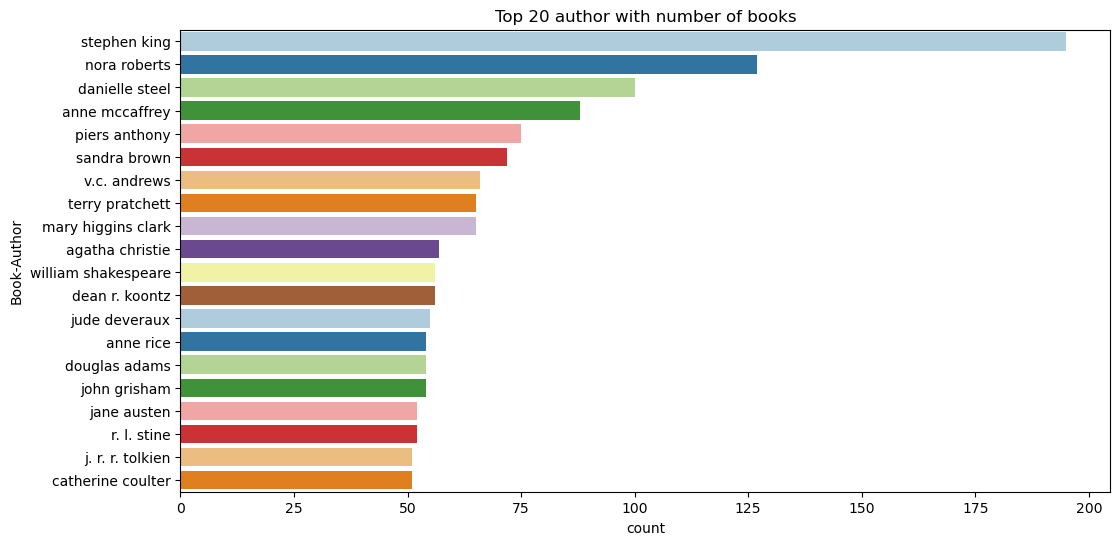

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author", palette="Paired", data=books, order=books['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0, 0.5, 'Count')

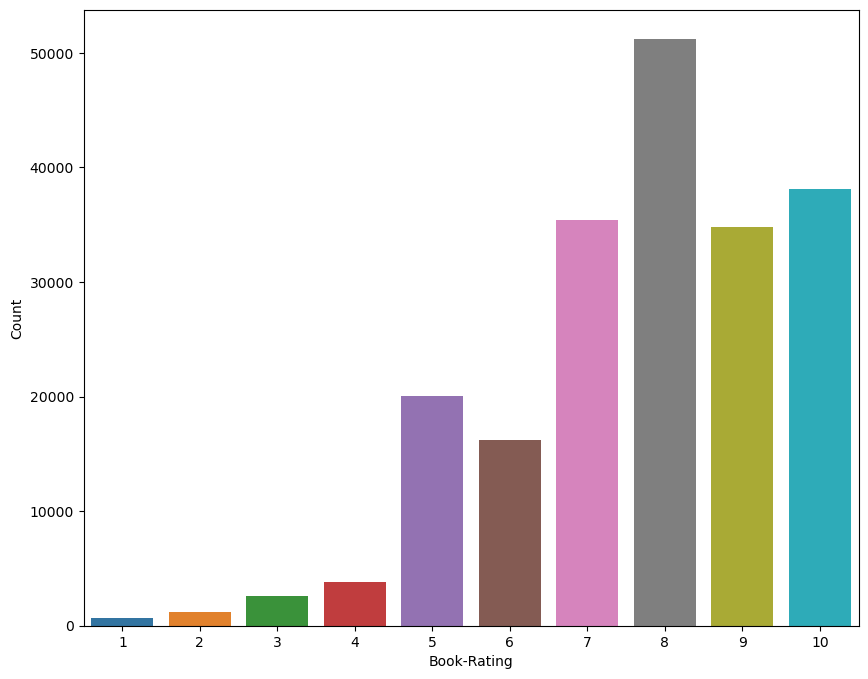

In [ ]:
plt.figure(figsize=(10,8))
rating_dstr = sns.countplot(x="Book-Rating",palette = 'tab10',data=ratings)
rating_dstr.set_ylabel('Count')

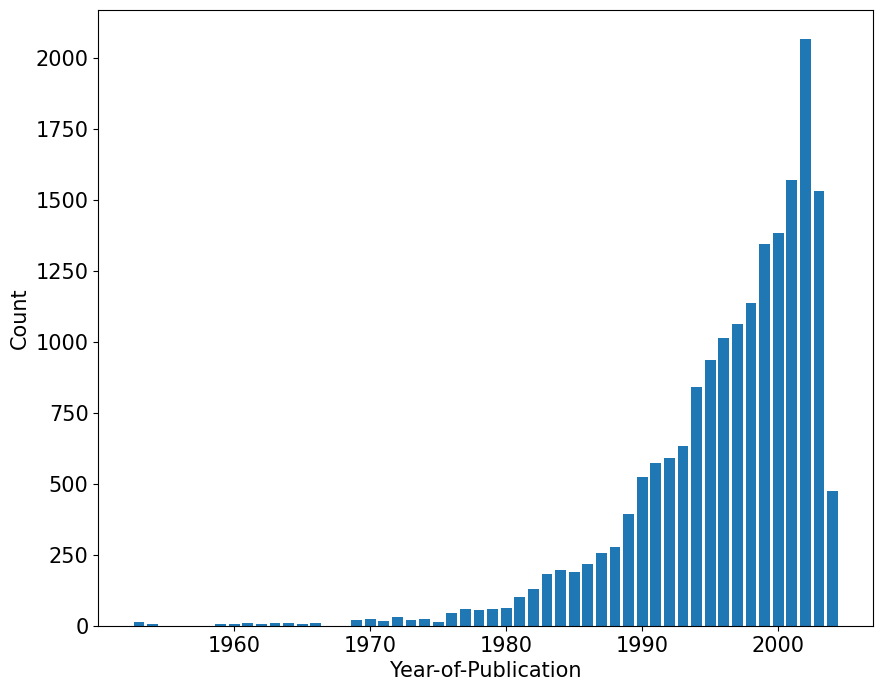

In [ ]:
year = books["Year-Of-Publication"].value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.bar(year.index, year.values)
plt.xlabel('Year-of-Publication')
plt.ylabel('Count')
plt.show()

In [ ]:
# Plot pie chart for country distribution
value_counts_country = users['User-Country'].value_counts()
top_categories = value_counts_country.head(5)
others_count = value_counts_country[5:].sum()
combined_categories = pd.concat([top_categories, pd.Series({'Others': others_count})])
pie_chart = plt.pie(combined_categories, labels=None, autopct='%1.1f%%', startangle=140)
plt.legend(combined_categories.index, loc="best")
plt.title("Distributions of User's Country")
plt.axis('equal')
plt.show()

In [ ]:
# Plot bar chart for age distribution
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of each Age Categories using the bookstore')

# Show plot
plt.show()